# Part 1

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Implement the Fisher-Wright model for an infinite population and asexual reproduction, you will need to use an ODE integration library, e.g. from scipy.integrate import odeint

In [2]:
def psm(N, s, m, n, x):
    return ((1-n)*(1+s)*x + m*(N-x))/(N+s*x)

In [3]:
def fisher_wright_infinite(s, m, n, T):
    def dX_dt(X, t):
        px_t = np.interp(t, np.arange(len(X)), X)
        numerator = px_t * (s - n - m - n * s) + m - s * px_t**2
        denominator = 1 + s * px_t
        return numerator / denominator

    X0 = np.array([0.0])
    t = np.linspace(0, T, T + 1)
    X = odeint(dX_dt, X0, t)
    return X.flatten()

## Test it using the same parameters as in the slides (lecture 14 pg 19)

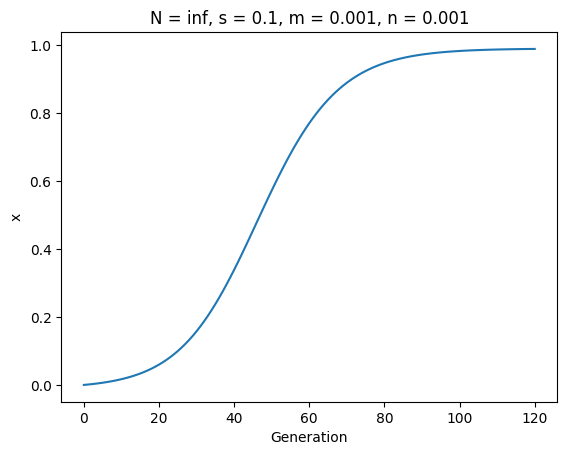

In [7]:
# Parameters
s = 0.1
m = 0.001
n = 0.001
T = 120

mutation_proportion = fisher_wright_infinite(s, m, n, T)

plt.plot(np.linspace(0, T, T + 1), mutation_proportion)
plt.xlabel('Generation')
plt.ylabel('x')
plt.title(f'N = inf, s = {s}, m = {m}, n = {n}')
plt.show()

## Now implement the Fisher Wright model for a finite population using asexual reproduction.

In [8]:
def fisher_wright_finite(N, s, m, n, T):
    mut_arr = [0] * T
    x = 0
    for t in range(T):
        p = psm(N,s,m,n,x)
        x = np.random.binomial(N, p)
        mut_arr[t] = x
    return mut_arr

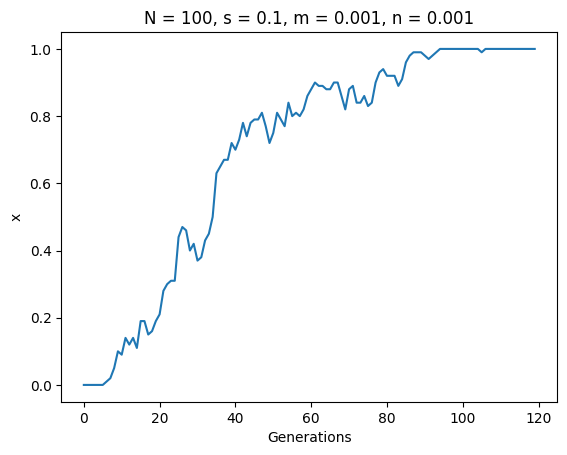

In [13]:
N = 100
s = 0.1
m = 0.001
n = 0.001
T = 120

mutants = fisher_wright_finite(N, s, m, n, T)
proportion = np.array(mutants) / N

plt.plot(range(T), proportion)
plt.xlabel('Generations')
plt.ylabel('x')
plt.title(f'N = {N}, s = {s}, m = {m}, n = {n}')
plt.show()

## Run it a few times. what do you notice?

The results are relatively random each time and increasing the population size causes the line to tend towards the line for an infinite population for the same parameters

## Write a function to run the FW model multiple times and average the results

In [14]:
def fisher_wright_Nsimulation(N, s, m, n, T, runs=1):
    results = []
    for _ in range(runs):
        results.append(fisher_wright_finite(N, s, m, n, T))
    return np.array(results)

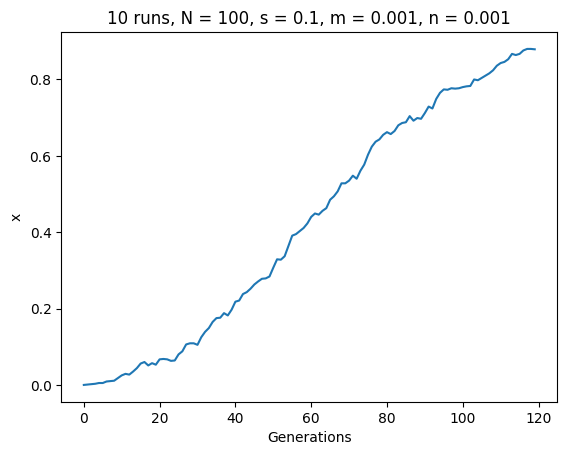

In [19]:
N = 100
s = 0.1
m = 0.001
n = 0.001
T = 120
runs = 10

nResults = fisher_wright_Nsimulation(N, s, m, n, T, runs)

proportions = []
for result in nResults:
    proportions.append(np.array(result) / N)

average = np.mean(proportions, axis=0)

plt.plot(range(T), average)
plt.xlabel('Generations')
plt.ylabel('x')
plt.title(f'{runs} runs, N = {N}, s = {s}, m = {m}, n = {n}')
plt.show()

Averaging over multiple runs seems to make the finite model closer to the infinite model.

## Now adjust your FW multiple runs model to return the take over time, i.e. when x/N > 0.95, and the proportion of mutants px= x/N , averaged over a given number of runs.

In [20]:
def fisher_wright_Nsimulation_takeover(N, s, m, n, T, runs=1):
    takeover = []
    proportions = []
    for _ in range(runs):
        mut_arr = [0] * T
        x = 0
        time = 0
        for t in range(T):
            p = psm(N,s,m,n,x)
            x = np.random.binomial(N, p)
            mut_arr[t] = x / N
            if x/N > 0.95 and time == 0:
                time = t
        takeover.append(time)
        proportions.append(mut_arr)

    avg_time = np.mean([t for t in takeover if t != 0])
    avg_proportion = np.mean(proportions, axis=0)

    return avg_time, avg_proportion

### Plot graphs of how the take-over time and proportion of mutants depends on the selection strength s (assume P = 10000 and u = v = 0.0001)

c:\Users\willi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\willi\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


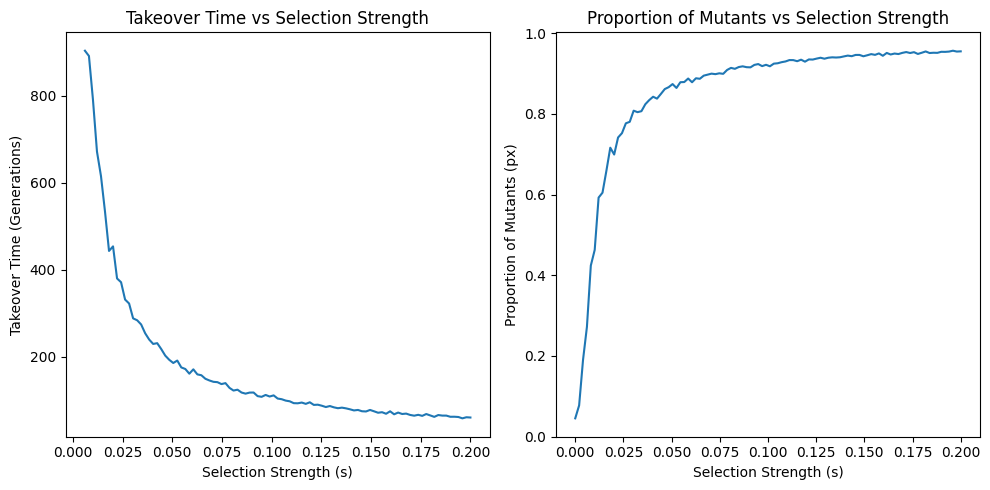

In [21]:
N = 10000
s_values = np.linspace(0, 0.2, 100)
u = 0.0001
v = 0.0001
T = 1000
runs = 10

takeover_times_s = []
avg_mutant_proportions_s = []
for s in s_values:
    avg_takeover_time, avg_mutant_proportion = fisher_wright_Nsimulation_takeover(N, s, u, v, T, runs)
    takeover_times_s.append(avg_takeover_time)
    avg_mutant_proportions_s.append(avg_mutant_proportion)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(s_values, takeover_times_s)
plt.xlabel('Selection Strength (s)')
plt.ylabel('Takeover Time (Generations)')
plt.title('Takeover Time vs Selection Strength')

plt.subplot(1, 2, 2)
plt.plot(s_values, np.mean(avg_mutant_proportions_s, axis=1))
plt.xlabel('Selection Strength (s)')
plt.ylabel('Proportion of Mutants (px)')
plt.title('Proportion of Mutants vs Selection Strength')
plt.tight_layout()
plt.show()

### Plot graphs of how the take-over time and proportion of mutants depends on the mutation rate u = v = m (assuming P = 10000 and s = 0.01)

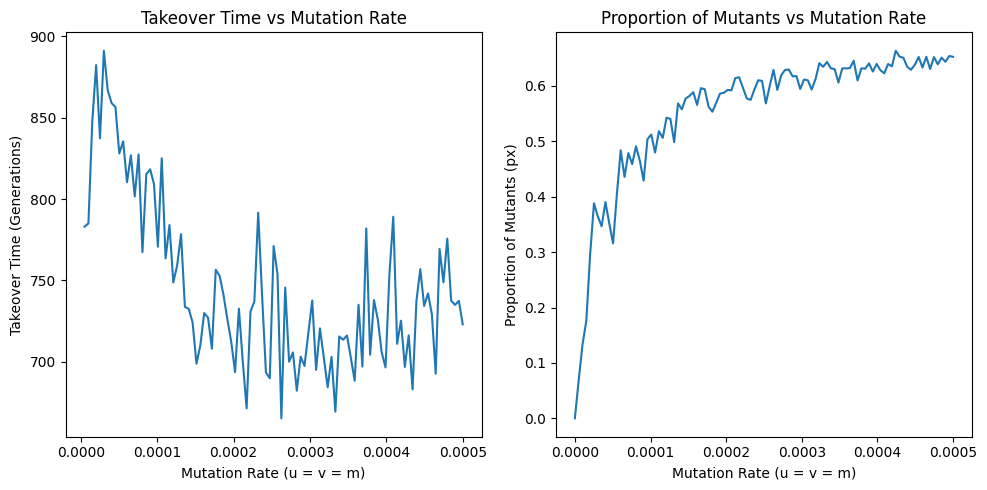

In [24]:
N = 10000
s = 0.01
m_values = np.linspace(0, 0.0005, 100)
T = 1000
runs = 10

takeover_times_m = []
avg_mutant_proportions_m = []
for m in m_values:
    avg_takeover_time, avg_mutant_proportion = fisher_wright_Nsimulation_takeover(N, s, m, m, T, runs)
    takeover_times_m.append(avg_takeover_time)
    avg_mutant_proportions_m.append(avg_mutant_proportion)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(m_values, takeover_times_m)
plt.xlabel('Mutation Rate (u = v = m)')
plt.ylabel('Takeover Time (Generations)')
plt.title('Takeover Time vs Mutation Rate')

plt.subplot(1, 2, 2)
plt.plot(m_values, np.mean(avg_mutant_proportions_m, axis=1))
plt.xlabel('Mutation Rate (u = v = m)')
plt.ylabel('Proportion of Mutants (px)')
plt.title('Proportion of Mutants vs Mutation Rate')
plt.tight_layout()
plt.show()

### Plot graphs of how the take-over time and proportion of mutants depends depends on the population size N (assuming s = 0.01 and u = v = 0.0001)

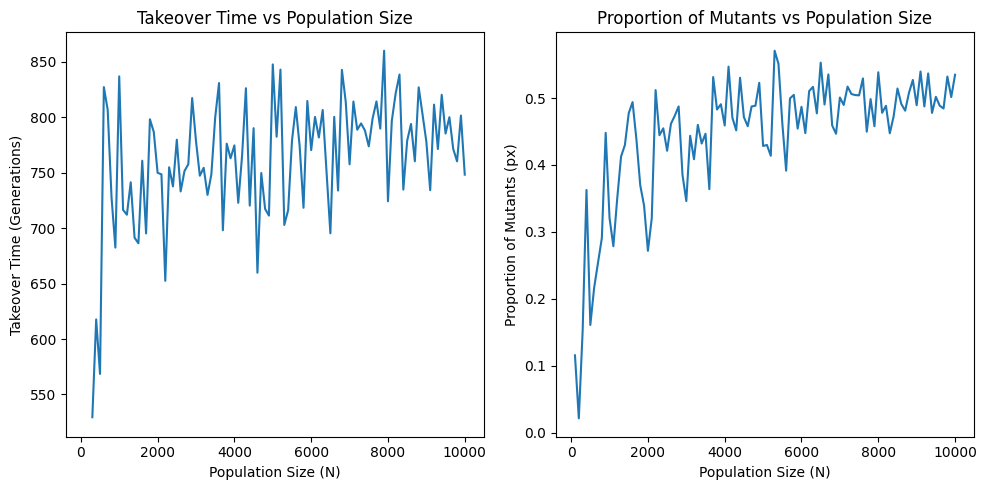

In [26]:
N_values = np.linspace(100, 10000, 100)
s = 0.01
u = 0.0001
v = 0.0001
T = 1000
runs = 10

takeover_times_N = []
avg_mutant_proportions_N = []
for N in N_values:
    avg_takeover_time, avg_mutant_proportion = fisher_wright_Nsimulation_takeover(N, s, u, v, T, runs)
    takeover_times_N.append(avg_takeover_time)
    avg_mutant_proportions_N.append(avg_mutant_proportion)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(N_values, takeover_times_N)
plt.xlabel('Population Size (N)')
plt.ylabel('Takeover Time (Generations)')
plt.title('Takeover Time vs Population Size')

plt.subplot(1, 2, 2)
plt.plot(N_values, np.mean(avg_mutant_proportions_N, axis=1))
plt.xlabel('Population Size (N)')
plt.ylabel('Proportion of Mutants (px)')
plt.title('Proportion of Mutants vs Population Size')
plt.tight_layout()
plt.show()

## Comment on what conditions are necessary for the mutant to take over the population

The main condition necessary seems to be the selection strength s. A larger s value leads to a higher proportion of mutations, leading to them taking over the population.

Increasing the population size N and mutation rate m seems to cause a plateu in the proportion of mutants around 0.5-0.6 meaning that these do not have as strong as an influence as the selection strength.

# Part 2

## Write a program to compute the transition matrix W for the Markov model

In [27]:
def markov_transition_matrix(N, s, m, n):
    W = np.zeros((N+1, N+1))
    for x in range(N+1):
        p = psm(N,s,m,n,x)
        for x_prime in range(N+1):
            W[x_prime, x] = np.math.comb(N, x_prime) * (p ** x_prime) * ((1 - p) ** (N-x_prime))

    return W

In [37]:
N = 100
s = 0.2
m = 0.005
n = 0.005

W = markov_transition_matrix(N, s, m, n)

print("Transition Matrix:")
print(W)

column_sums = np.sum(W, axis=0)
print("Column Sums:")
print(column_sums)

Transition Matrix:
[[6.05770436e-001 1.82684043e-001 5.45617949e-002 ... 2.26554836e-167
  1.84802531e-188 7.88860905e-231]
 [3.04407255e-001 3.13217152e-001 1.61018894e-001 ... 1.02839022e-163
  1.37480755e-184 1.56983320e-226]
 [7.57193925e-002 2.65824899e-001 2.35217824e-001 ... 2.31072223e-160
  5.06268728e-181 1.54636420e-222]
 ...
 [1.54636420e-222 7.98928951e-171 3.09269076e-148 ... 2.71812644e-001
  2.35312246e-001 7.57193925e-002]
 [1.56983320e-226 2.76724672e-174 1.84382411e-151 ... 2.49257973e-001
  3.53649725e-001 3.04407255e-001]
 [7.88860905e-231 4.74452571e-178 5.44136275e-155 ... 1.13144556e-001
  2.63091804e-001 6.05770436e-001]]
Column Sums:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


## Write a program to generate the Markov distribution for each time step

In [32]:
def markov_distribution(W, t):
    p0 = np.zeros(N+1)
    p0[0] = 1
    W_t = np.linalg.matrix_power(W, t)
    return np.dot(W_t, p0)

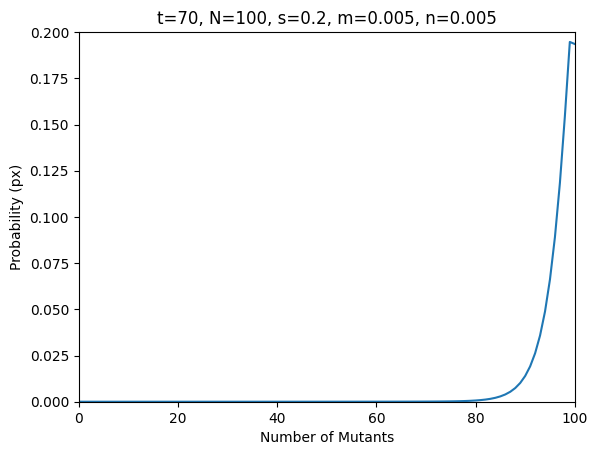

In [38]:
t = 70
bruh = markov_distribution(W, t)
num_mutants = np.arange(len(bruh))

# Plot
plt.plot(num_mutants, bruh)
plt.ylim(0,0.2)
plt.xlim(0,N)
plt.xlabel('Number of Mutants')
plt.ylabel('Probability (px)')
plt.title(f't={t}, N={N}, s={s}, m={m}, n={n}')
plt.show()

## Calculate the average of this distribution for each time step

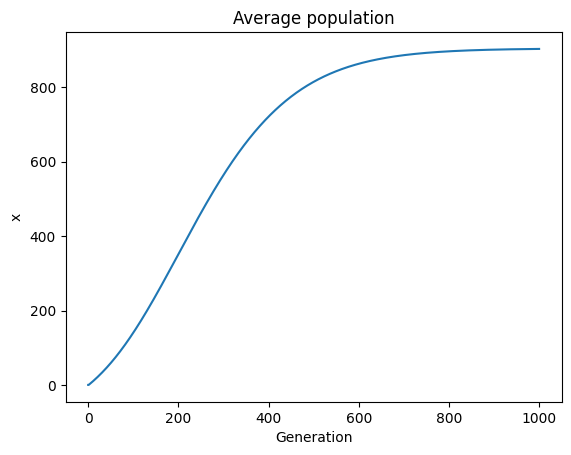

In [39]:
N = 1000
s = 0.01
n = 0.001
m = 0.001
T = 1000

W = markov_transition_matrix(N,s,n,m)
totals = np.zeros(T + 1)

for t in range(T):
    p = markov_distribution(W, t)
    bruh = np.dot(np.arange(N + 1), p)
    totals[t + 1] = bruh

plt.plot(np.arange(T+1), totals)
plt.xlabel('Generation')
plt.ylabel('x')
plt.title('Average population')
plt.show()

## Use your previous code to generate a histogram of the number of mutants after the same number of time steps using the Fisher Wright model, and plot it with the Markov distribution after differing numbers of time steps (e.g. 100, 500, 1000), using the density=True option on plt.hist will help the scaling

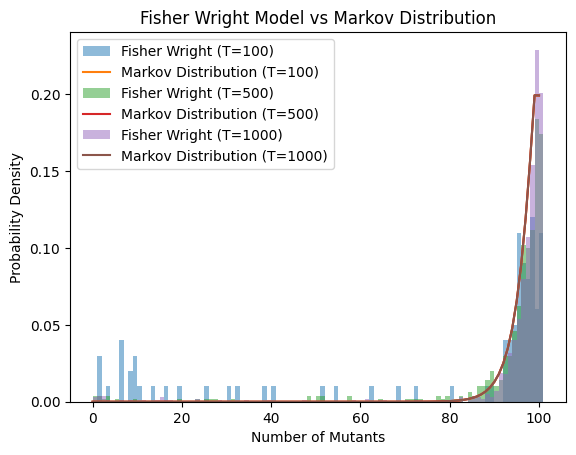

In [40]:

def generate_histogram(N, s, m, n, T):
    mutants = fisher_wright_finite(N, s, m, n, T)
    plt.hist(mutants, bins=np.arange(N+2), density=True, alpha=0.5, label=f'Fisher Wright (T={T})')

def generate_markov_distribution(N, s, m, n, T):
    W = markov_transition_matrix(N, s, m, n)
    distribution = markov_distribution(W, T)
    plt.plot(np.arange(N+1), distribution, label=f'Markov Distribution (T={T})')

N = 100
s = 0.2
m = 0.005
n = 0.005
T_values = [100, 500, 1000]

for T in T_values:
    generate_histogram(N, s, m, n, T)
    generate_markov_distribution(N, s, m, n, T)

plt.xlabel('Number of Mutants')
plt.ylabel('Probability Density')
plt.title('Fisher Wright Model vs Markov Distribution')
plt.legend()
plt.show()